<a href="https://colab.research.google.com/github/kamrulhasan04947/mlprac/blob/main/Cancer_prediction_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# **Data Preprcessing**

**EDA**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/dataset/Cancer_Data.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
df.shape

(569, 32)

In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
df.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: i

Findings Of EDA :
1. All features are categorical.
2. In all categorical features have lots of unique value but most of these numerical value. So no need to apply any kind of encoding except 'diagnosis'
3. Only 'diagnosis' column have binary category and string data type. here may be perform binary encoding based on data set.
4. 'id' and 'Unnamed 32' detected as noise in hole data.So these should be removed.
5. 'diagnosis' is the tergat feacher of the data set.


**Feature Engineering**

Actions Doing based on EDA findings

In [ ]:
#Remove unnessecery Features
df.drop(["id"], axis=1, inplace=True)

NameError: ignored

In [ ]:
#show columns after droping columns
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
# show total columns in data
print(len(df.columns))

31


**Diagnosis Features Engineering accordin to EDA findings**

In [ ]:
df_diagnosis_unique = df['diagnosis'].unique()
len(df_diagnosis_unique)

2

In [ ]:
# chacking  unique value to know how many category in this column .
# and deside which type of encoding may be perform
df_diagnosis_unique

array(['M', 'B'], dtype=object)

In [ ]:
# # here Two category in this  column
# I deside that perform
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()

In [ ]:
df['diagnosis'] = label_binarizer.fit_transform(df['diagnosis'])

In [ ]:
df['diagnosis'].unique()

array([1, 0])

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


**Data visualization**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

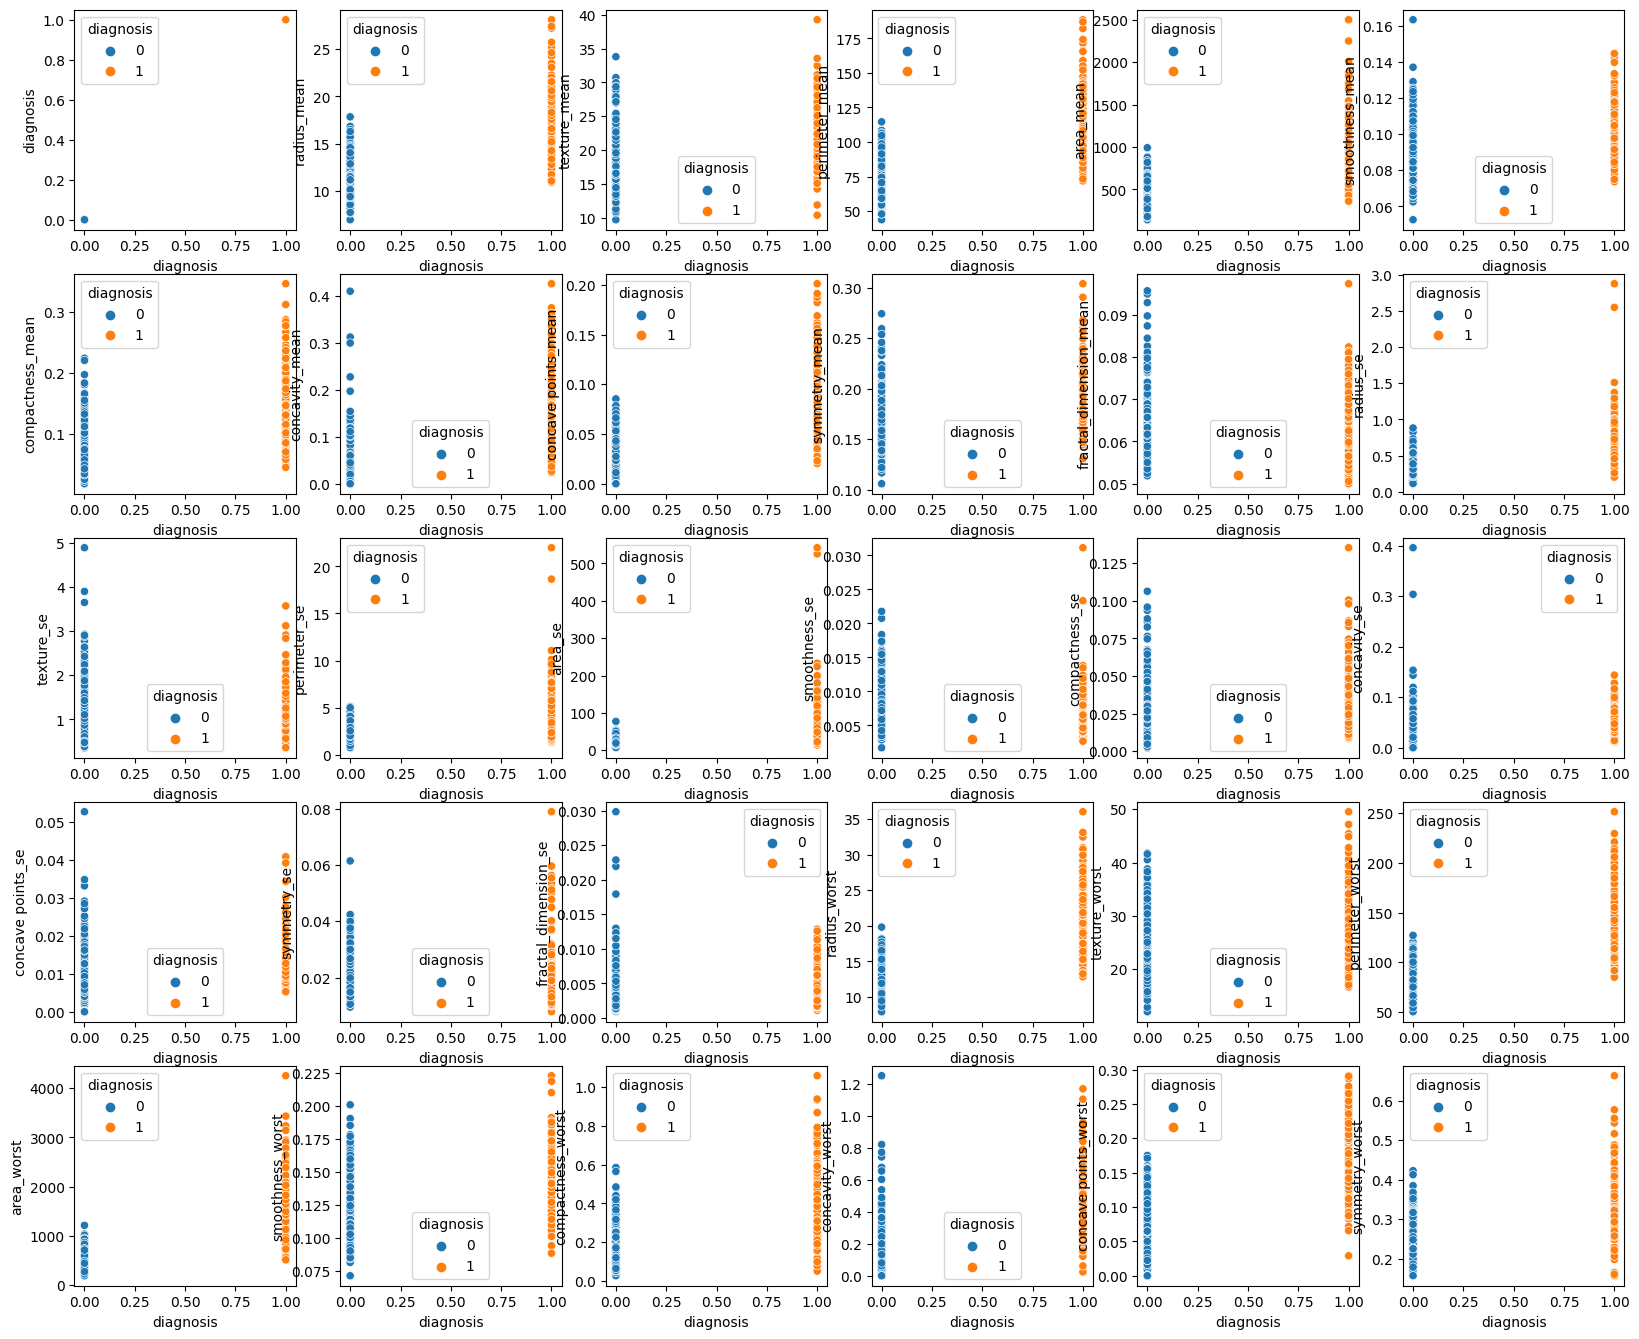

In [ ]:
plt.figure(figsize=(20,20))
plotnum = 1
for col in df.columns:
  if plotnum < 31:
    ax = plt.subplot(6,6, plotnum)
    sns.scatterplot(data=df, x=df.diagnosis, y=df[col], ax=ax, hue='diagnosis')
    plt.xlabel('diagnosis')
    plt.ylabel(col)
  plotnum += 1
plt.show()

<Axes: >

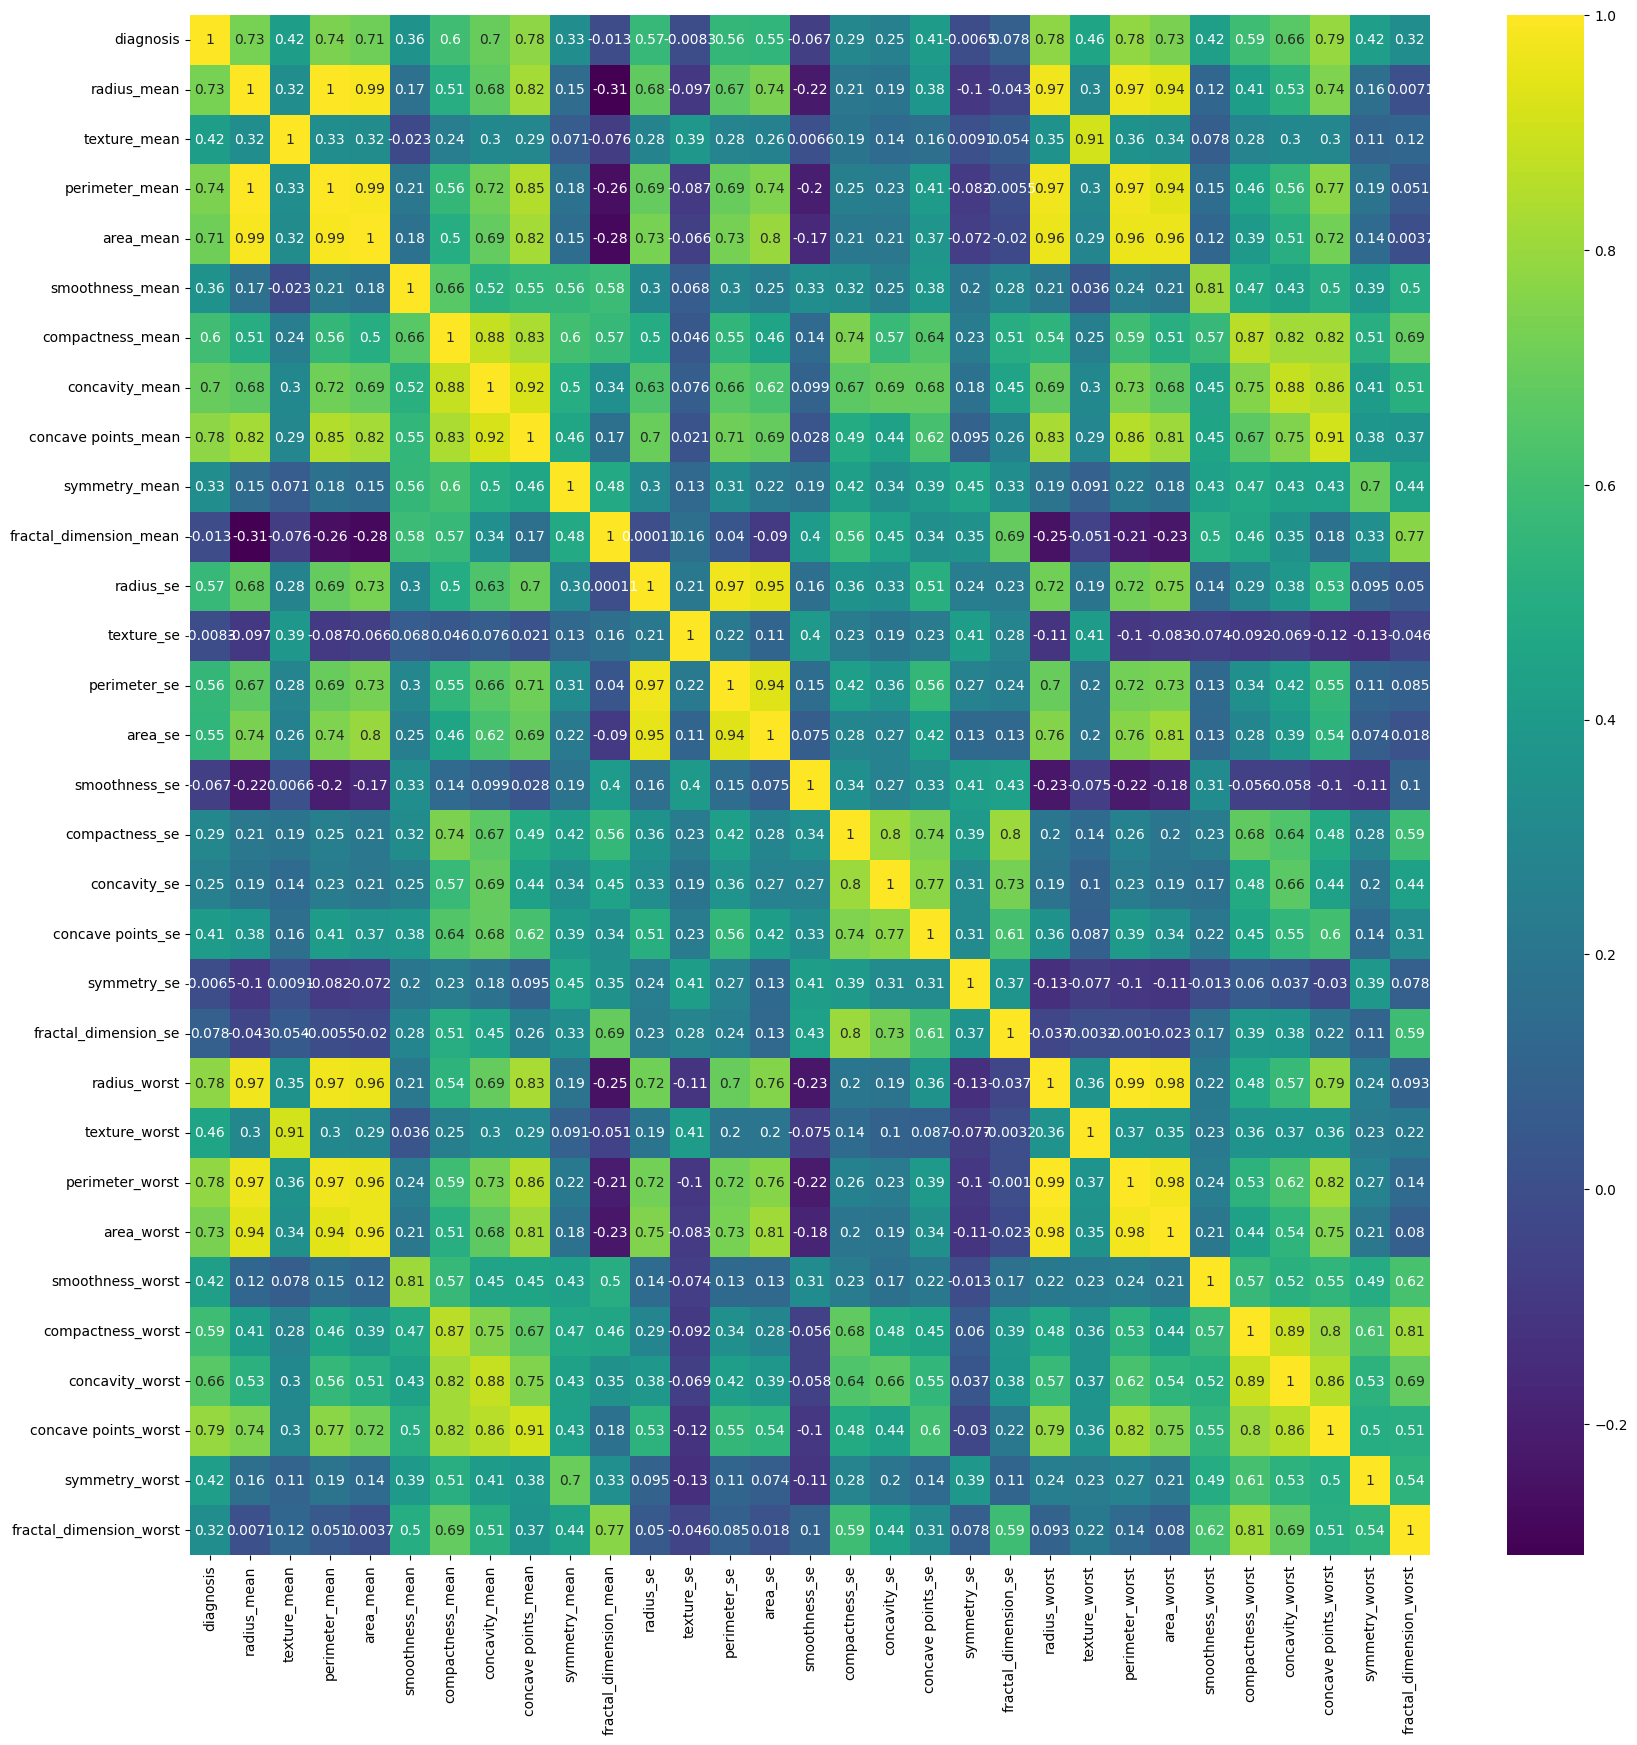

In [ ]:
# showing data corelation in data set by heat map
fig, ax = plt.subplots(figsize= (20, 20))
sns.heatmap(df.corr(), annot=True, cmap="viridis", cbar=True)

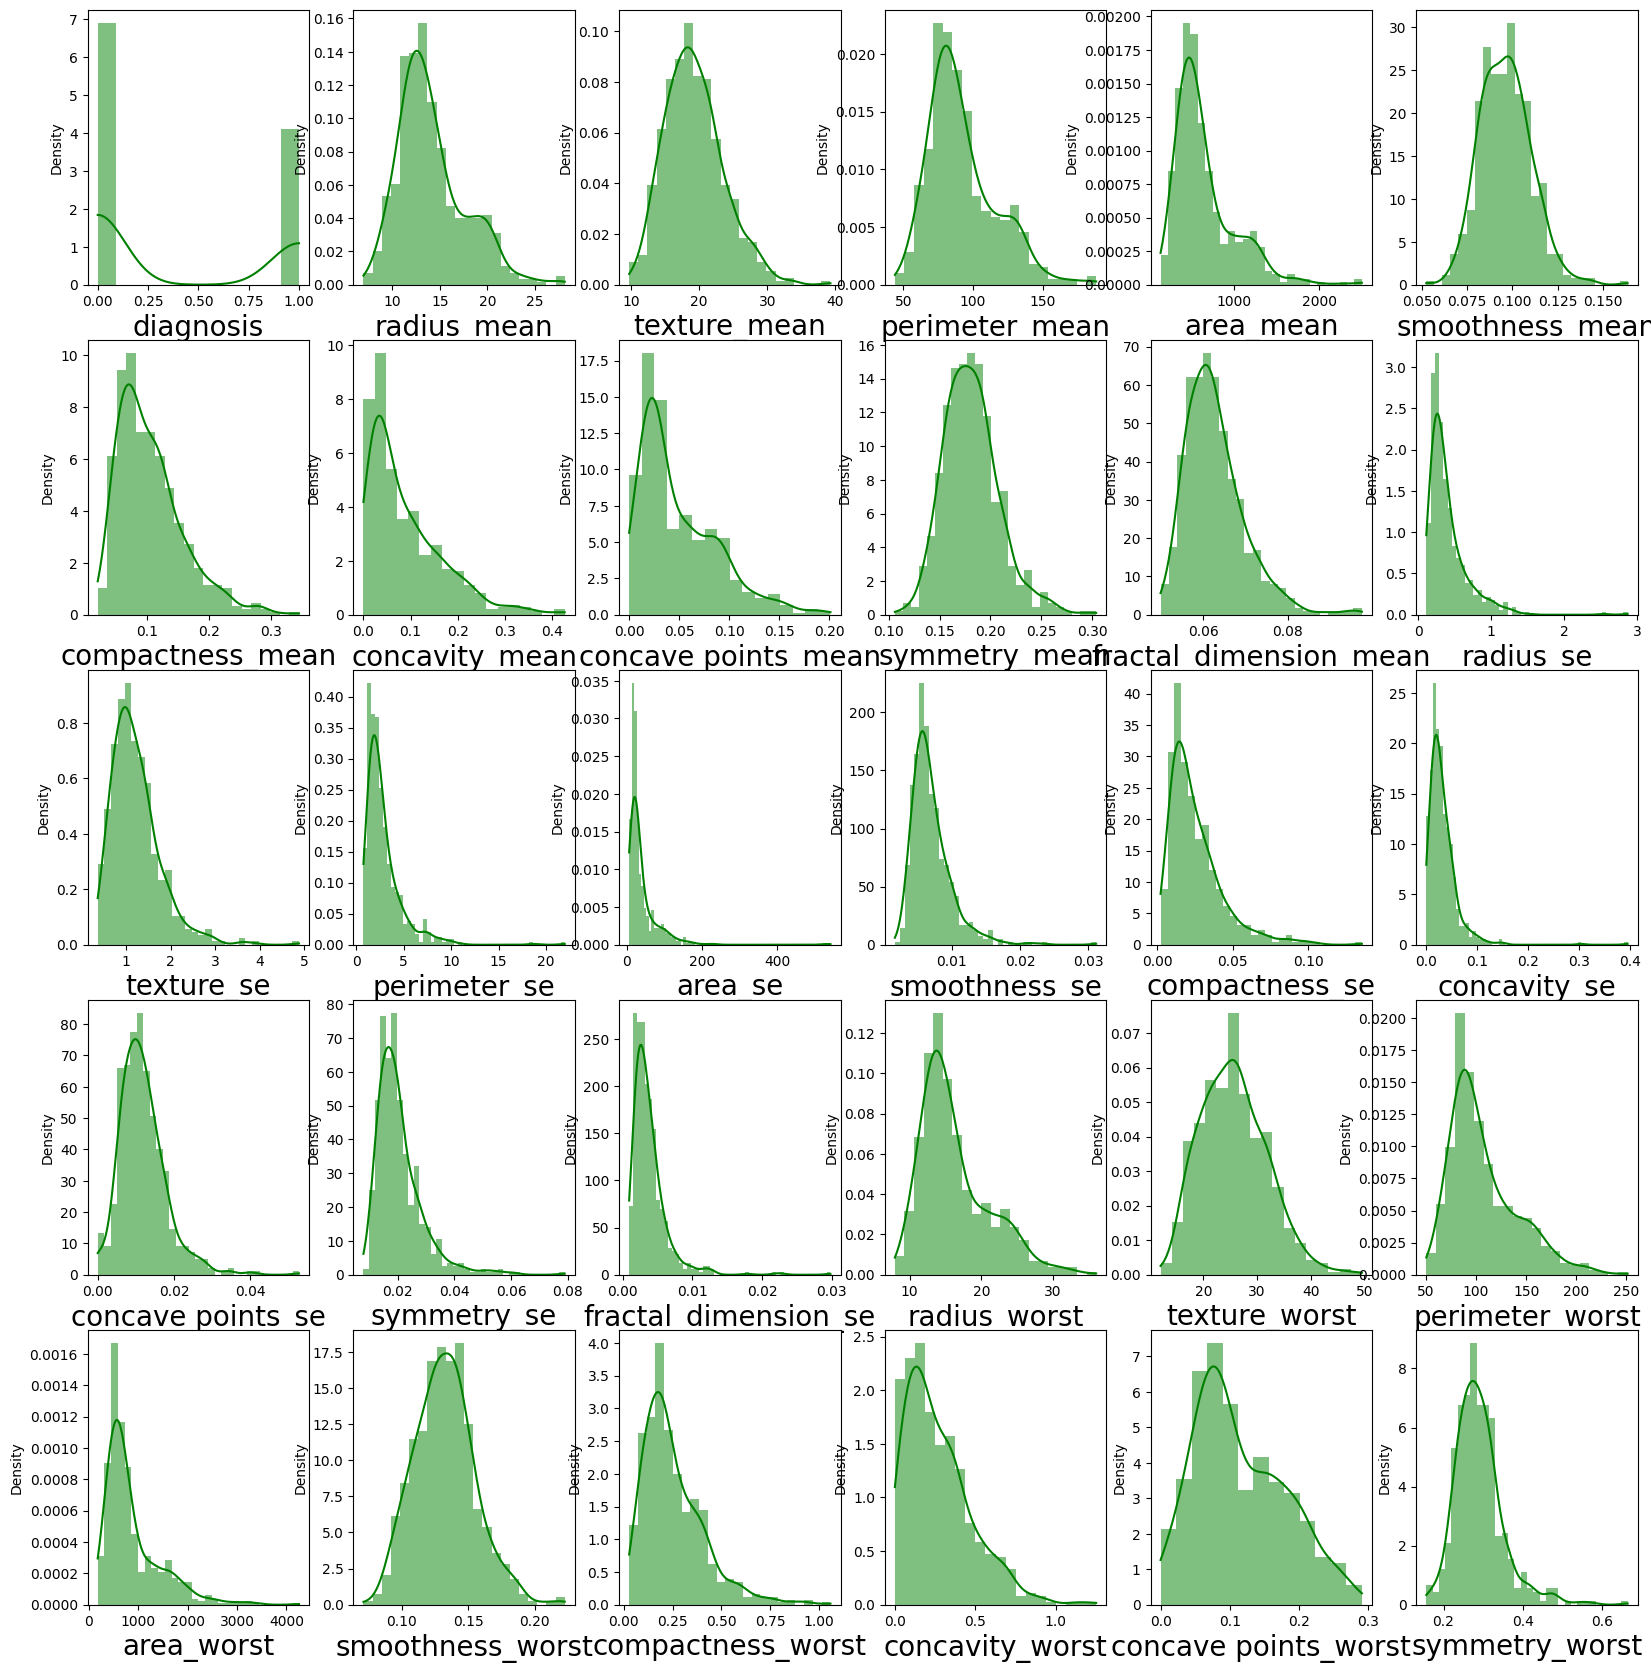

In [ ]:
#Visualizing  data densidy curve
plt.figure(figsize=(20, 25), facecolor='white')
plotNumber = 1

for column in df:
  if plotNumber < 31:
    ax = plt.subplot(6, 6, plotNumber)
    sns.histplot(df[column], color="green", label="100% Equities", kde=True, stat="density", linewidth=0)
    plt.xlabel(column, fontsize=20)
  plotNumber +=1
plt.show()

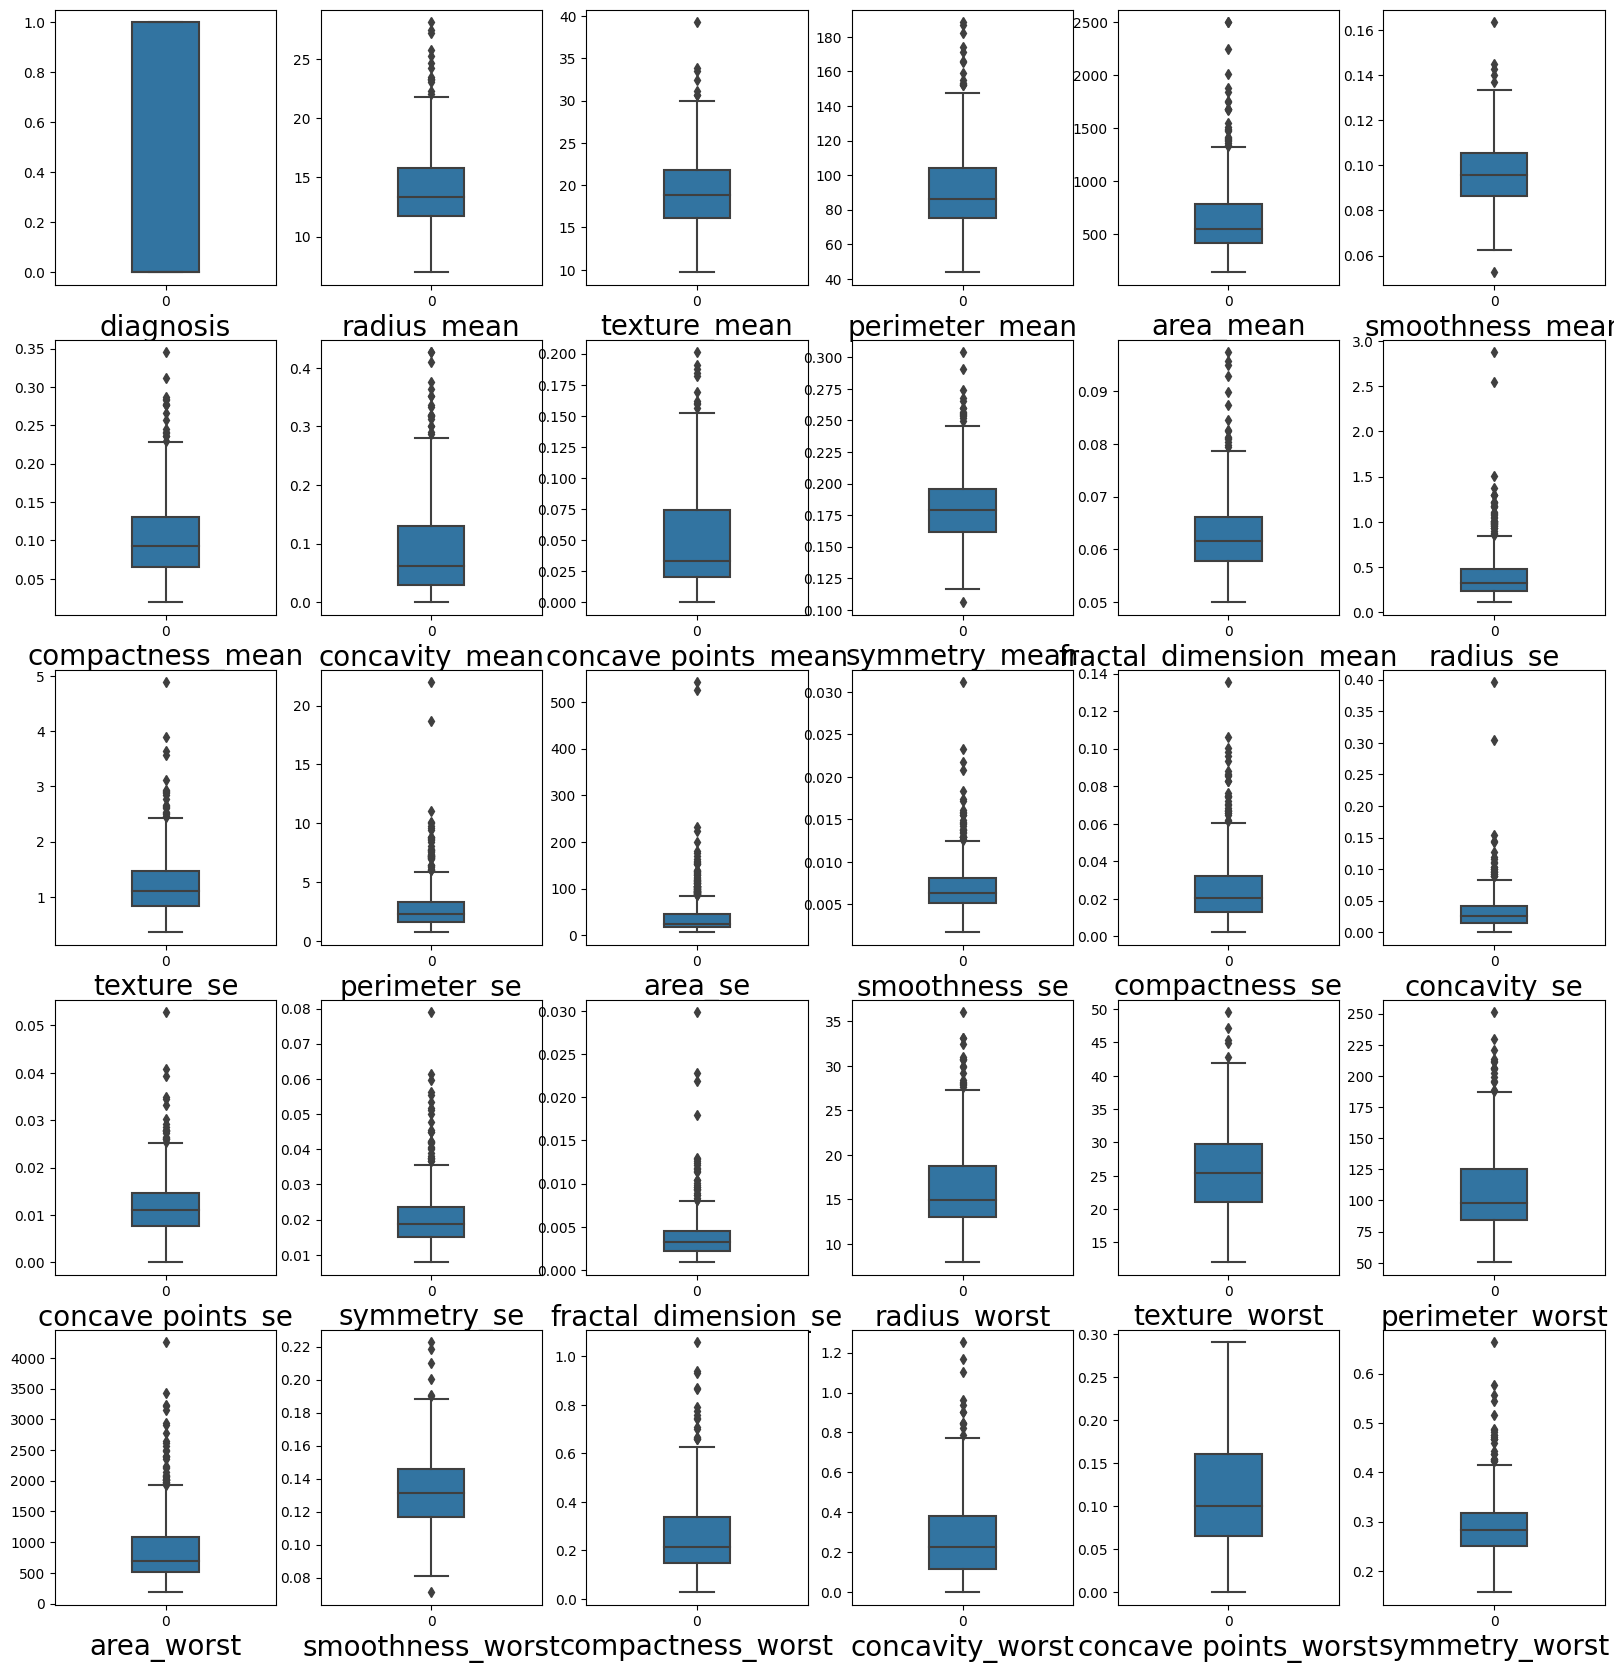

In [ ]:
# show induvisual coumn plot to batter underastand outliers

plt.figure(figsize=(20, 25), facecolor='white')
plotNumber = 1

for column in df:
  if plotNumber < 31:
    ax = plt.subplot(6, 6, plotNumber)
    sns.boxplot(data=df[column], ax=ax, width=0.3, fliersize=5)
    plt.xlabel(column, fontsize=20)
  plotNumber +=1
plt.show()

**Findings from visualization**


1. Mosta of features have outliers . To resolver outliers there is a methode called IQR .

2. In Heat map corealation we show that 'fractal_dimension_mean', 'smoothness_se', 'symmetry_se', tow columns data corelation is under rated. So I predict that these data can do model underfited.I will remove these data column form data set and test the model performence. It's may help to find good accuracy of model.


**Droping unnessery column**

In [ ]:
# df1 = df.drop(['fractal_dimension_mean',  'texture_se', 'smoothness_se', 'symmetry_se', 'fractal_dimension_se'], axis=1)

In [ ]:
df1 = df.drop(['fractal_dimension_mean', 'texture_se', 'smoothness_se', 'symmetry_se'], axis=1)

In [ ]:
# df1 = df.copy()

## **Outliers Handeling**

In [ ]:
len(df1.columns)

27

In [ ]:
df1.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se',
       'area_se', 'compactness_se', 'concavity_se', 'concave points_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
# #try with z score
# for column in df:
#   upper_lim = df[column].mean() + 3.0 * df[column].std()
#   lower_lim = df[column].mean() - 3.0 * df[column].std()
#   df.loc[df[column] >= upper_lim, column] = upper_lim
#   df.loc[df[column] <= lower_lim, column] = lower_lim


In [ ]:
#try with IQR
for column in df1:
  IQR = df1[column].quantile(0.75) - df1[column].quantile(0.25)
  upper_lim = df1[column].quantile(0.75) + (IQR * 1.5)
  lower_lim = df1[column].quantile(0.25) - (IQR * 1.5)
  df1.loc[df1[column] >= upper_lim, column] = upper_lim
  df1.loc[df1[column] <= lower_lim, column] = lower_lim

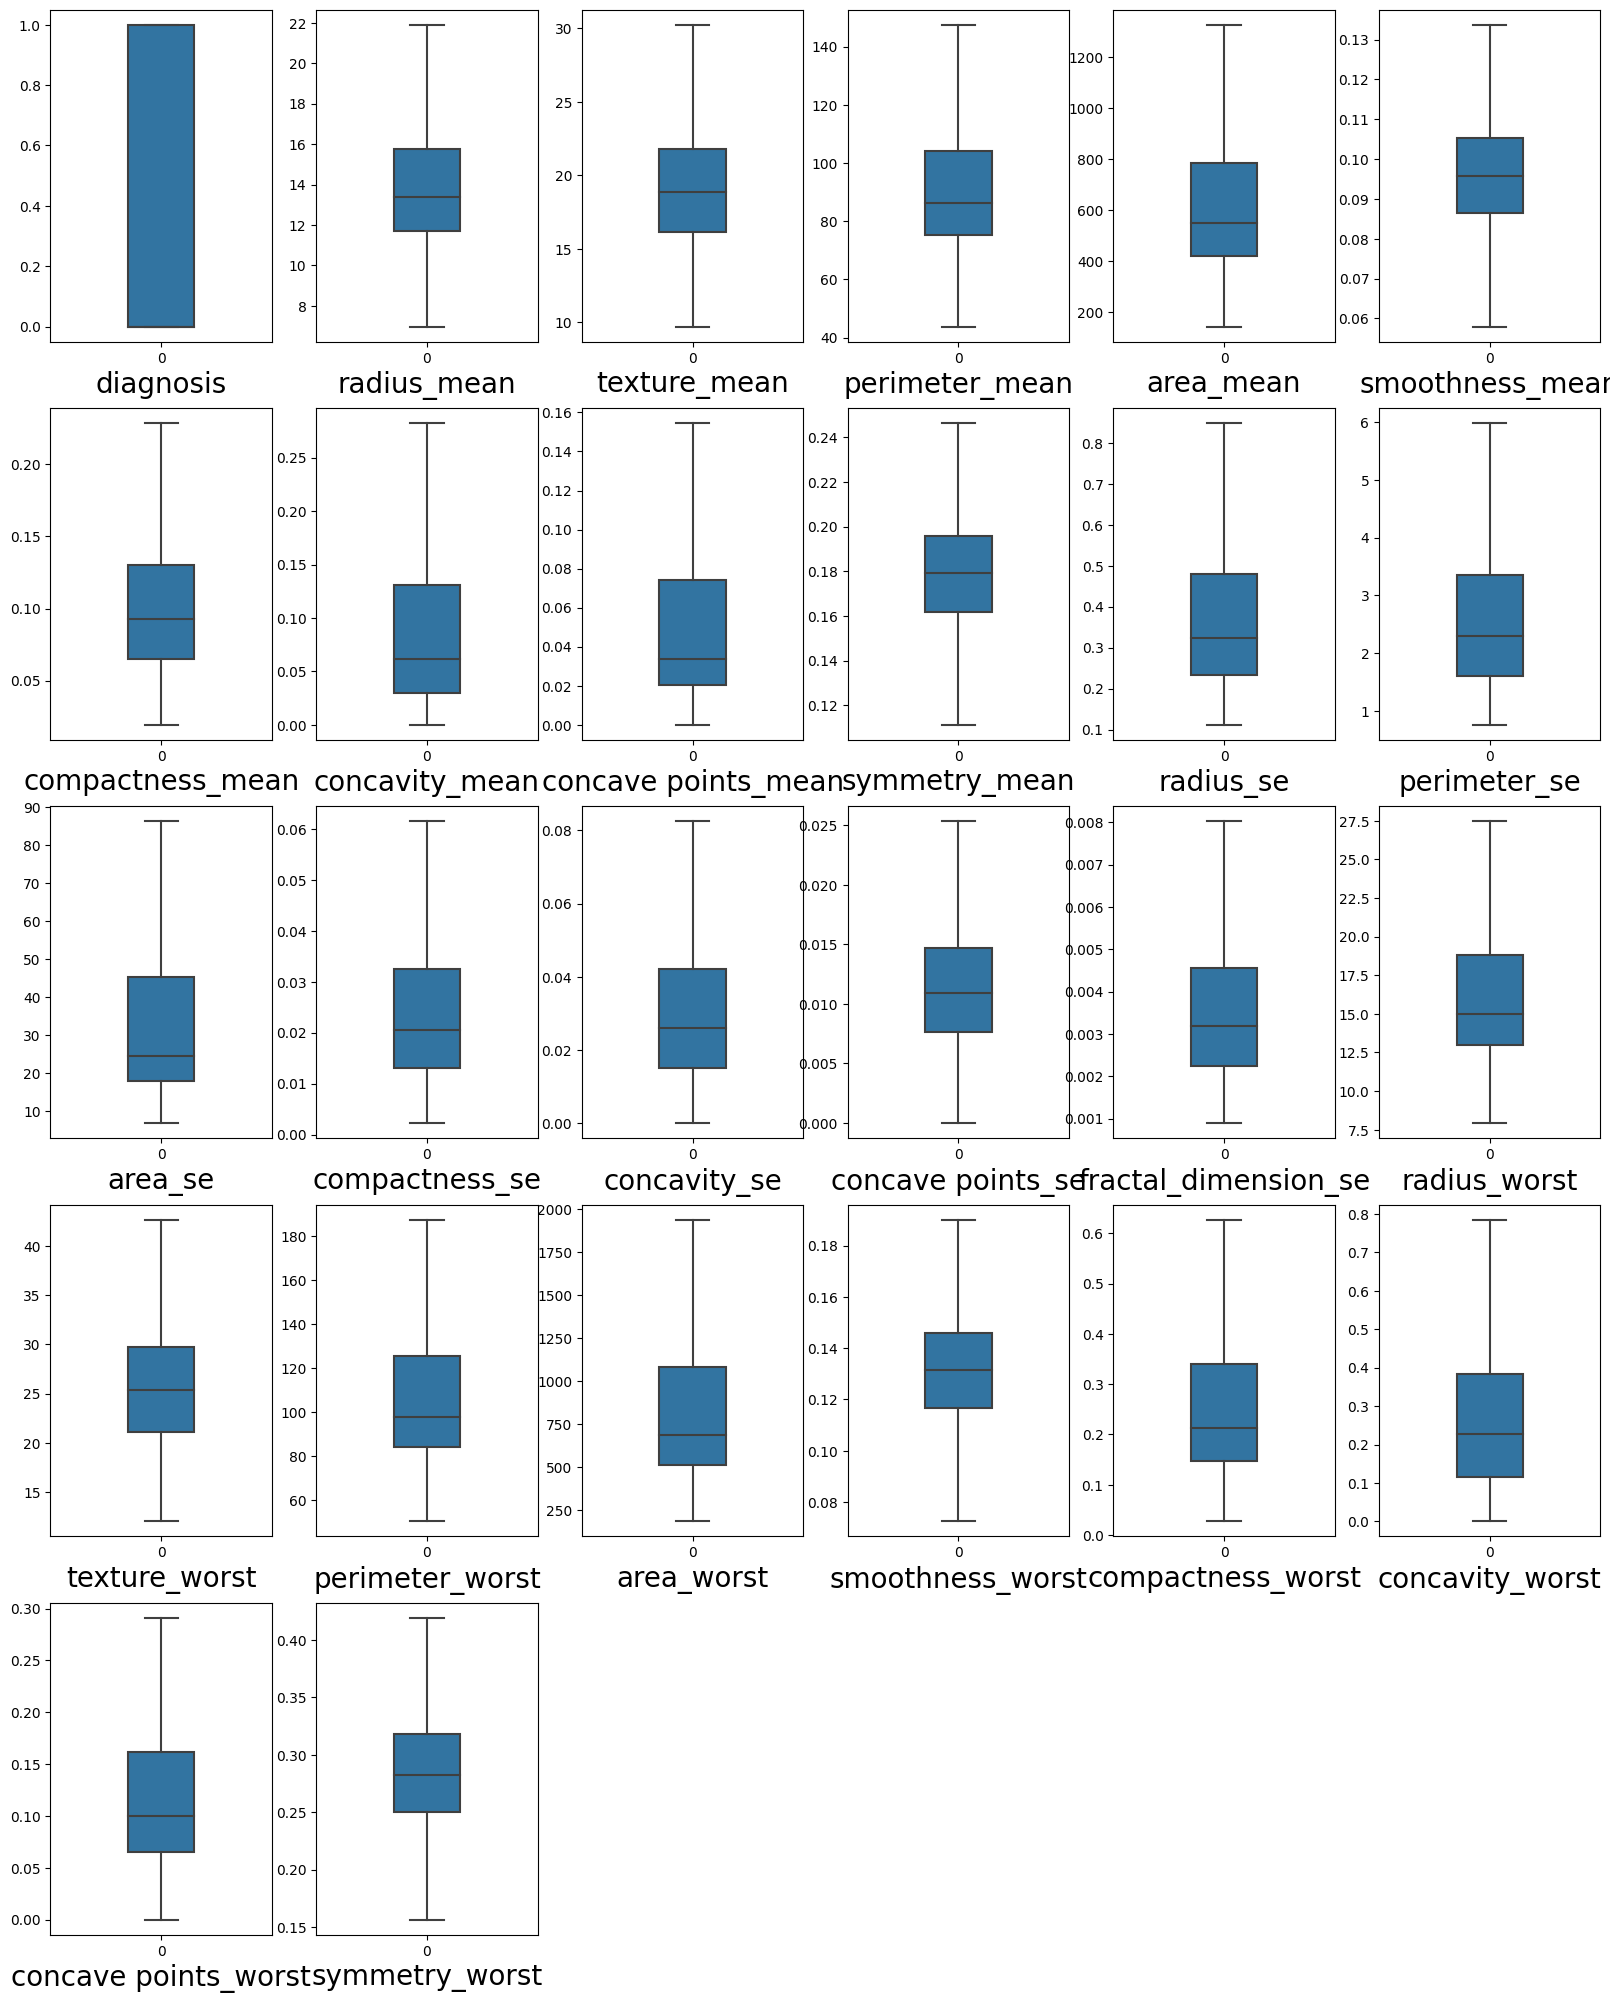

In [ ]:
#checking Outliers may removed
plt.figure(figsize=(20, 25), facecolor='white')
plotNumber = 1
for column in df1:
  if plotNumber < 27:
    ax = plt.subplot(5, 6, plotNumber)
    sns.boxplot(data=df1[column], ax=ax, width=0.3, fliersize=5)
    plt.xlabel(column, fontsize=20)
  plotNumber +=1
plt.show()

<Axes: >

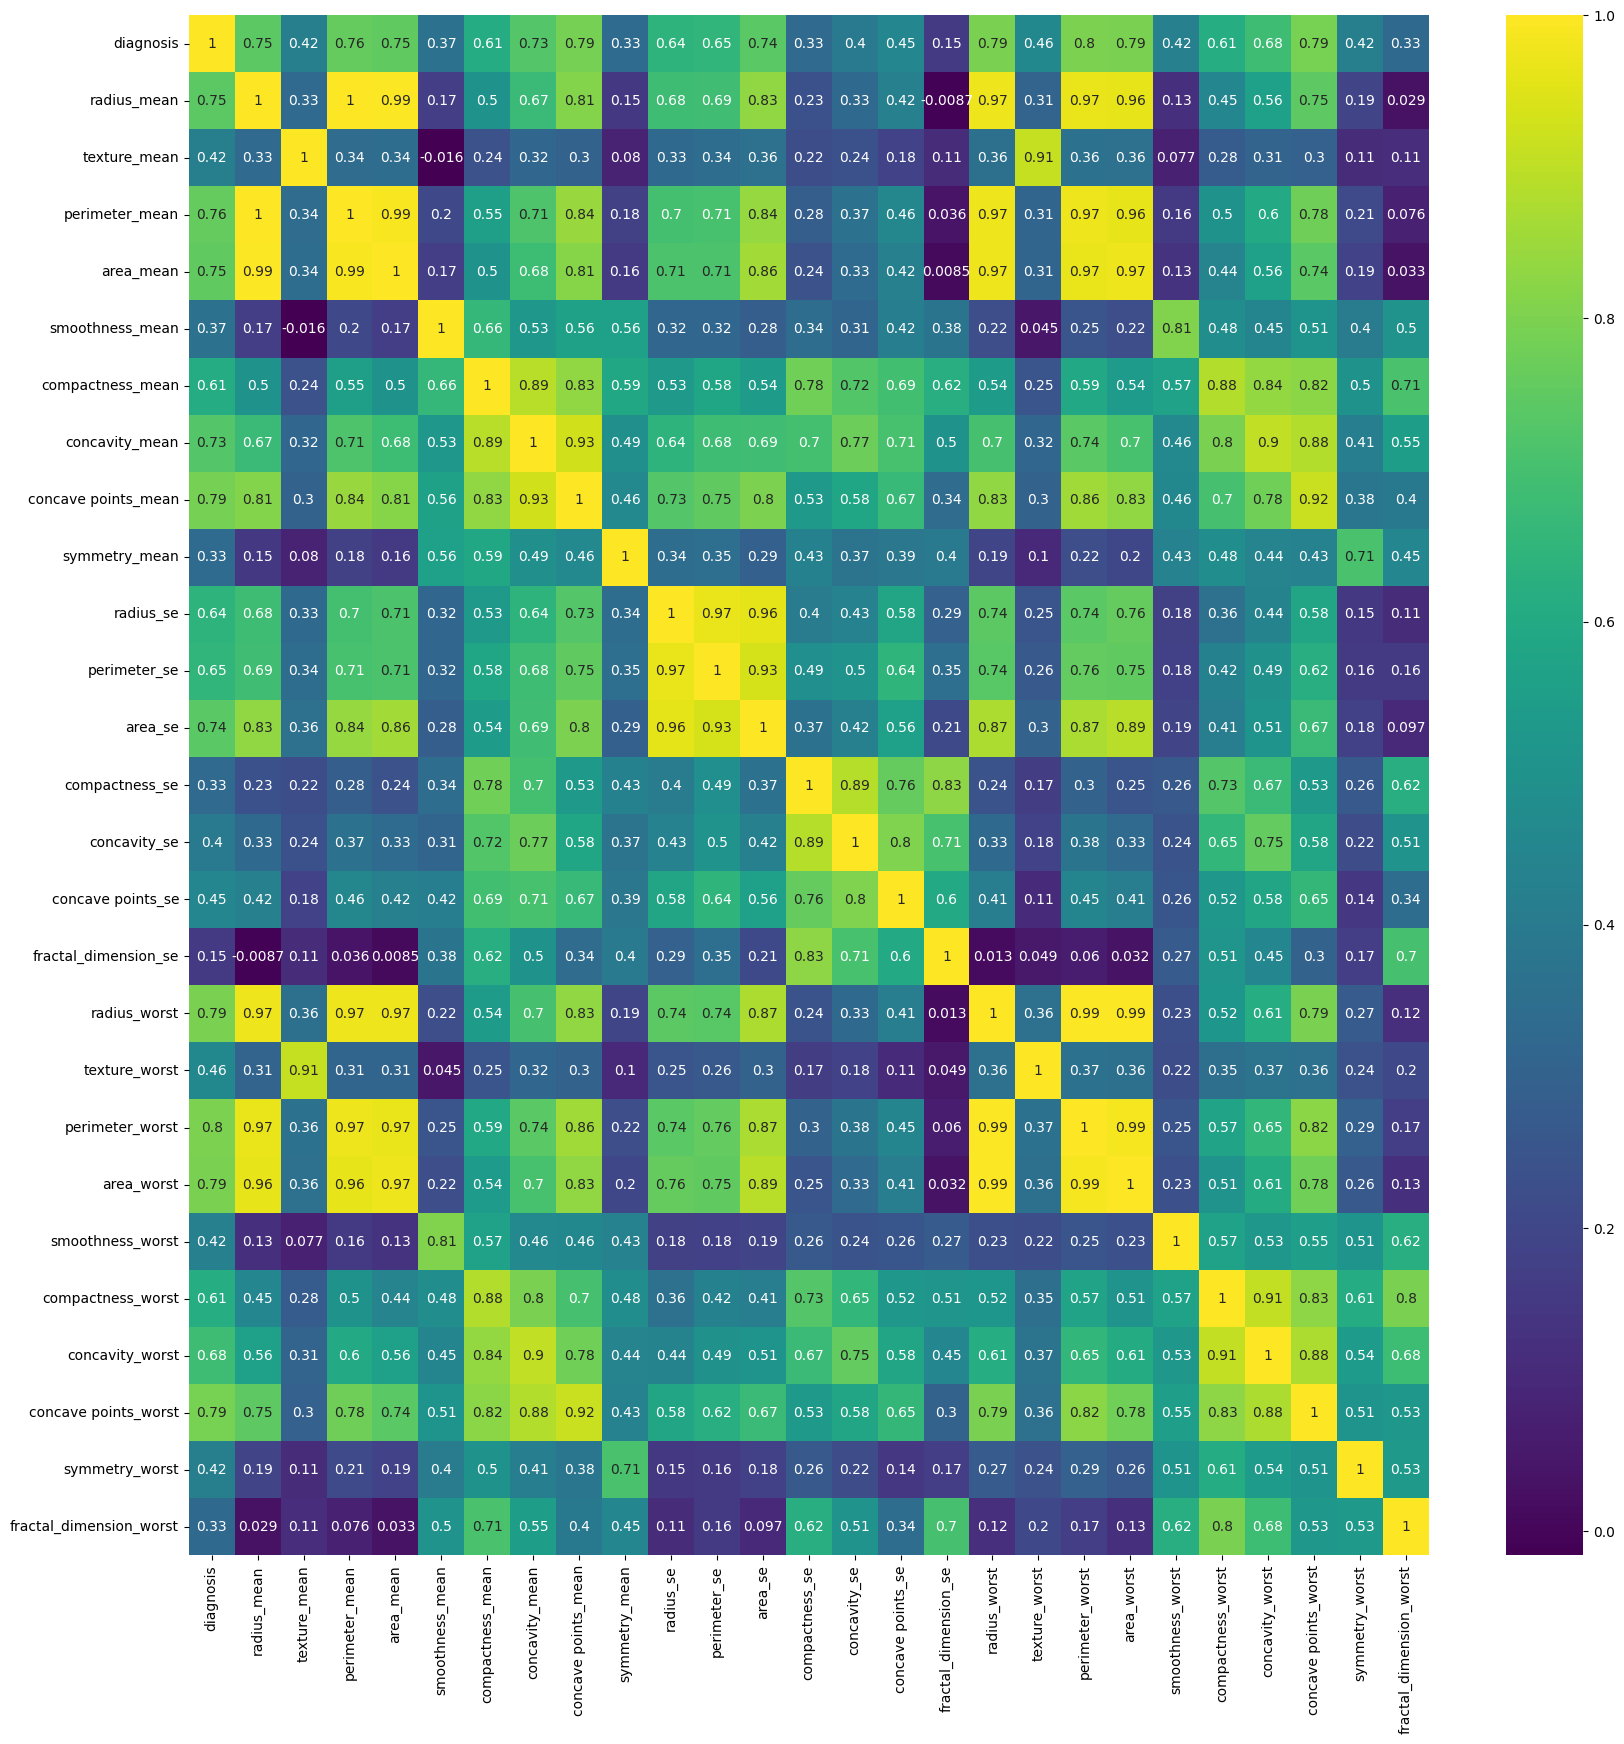

In [ ]:
#agian assigining heat map to show corelations after removing outliers and droping unecessery columns
fig, ax = plt.subplots(figsize= (20, 20))
sns.heatmap(df1.corr(), annot=True, cmap="viridis", cbar=True)

**Model Cross validation:**

In [ ]:
# x contain featuers and y contain target
x = df1.drop(['diagnosis'] , axis = 1)

y = df1['diagnosis']

y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
564    1.0
565    1.0
566    1.0
567    1.0
568    0.0
Name: diagnosis, Length: 569, dtype: float64

In [ ]:
from sklearn.model_selection import cross_val_predict, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import  GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer, StandardScaler, RobustScaler, MinMaxScaler


In [ ]:
nm = StandardScaler()
data_nm = nm.fit_transform(x)
data = pd.DataFrame(data_nm, columns= x.columns)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data,  y, test_size = 0.33, random_state=42)

In [ ]:
# findin which kernal is best for train
grid_param = {'C': [0.1, 0.01, 0.1, 1, 100],
              'gamma': [1, 0.75, 0.5, 0.25],
              'kernel': ['rbf', 'poly', 'linear']}

grid = GridSearchCV(SVC(), grid_param,  refit=True,  verbose=3)
fitdata =  grid.fit(x_train,  y_train)
fitdata.best_params_

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.623 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.618 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.618 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.618 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.618 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.974 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.921 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.974 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.961 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.895 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.987 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [ ]:
# Cross valedating SVM accuracy
svm = SVC(C = 0.1,  gamma= 1, kernel='linear', probability=True)
svm_ypredict = cross_val_predict(svm, x_test, y_test, cv=9)
svm_sc = accuracy_score(y_test, svm_ypredict)*100
print(f"Accuracy of SVM Classifier : {'{:.3f}'.format(svm_sc)}")

Accuracy of SVM Classifier : 97.340


In [ ]:
#Cross validating Logistic accuracy
log_reg = LogisticRegression()
log_predict = cross_val_predict(log_reg , x_test , y_test , cv=10)
log_accur = accuracy_score(y_test, log_predict)*100
print(f"Accuracy of Logistic Regrassion : {'{:.3f}'.format(log_accur)}")

Accuracy of Logistic Regrassion : 97.872


# **Model training**

In [ ]:
svm = SVC(C = 0.1,  gamma= 1, kernel='linear', probability=True)
svm.fit(x_train, y_train)
svm_predict =svm.predict(x_test)
svm_clr = classification_report(y_test, svm_predict)
print(svm_clr)

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       121
         1.0       0.98      0.97      0.98        67

    accuracy                           0.98       188
   macro avg       0.98      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188



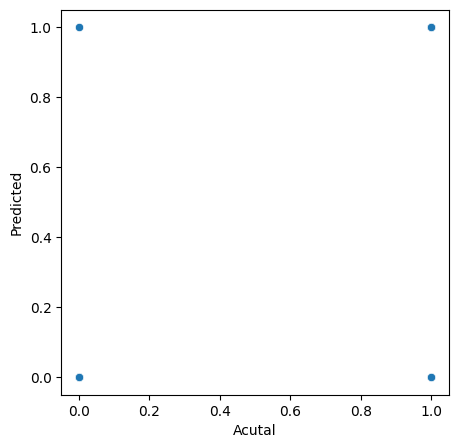

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.xlabel("Acutal", fontsize=10)
plt.ylabel("Predicted", fontsize=10)
sns.scatterplot(x=y_test, y=svm_predict, ax=ax)
plt.show()

Above analysis desided that this Data set is working good at linear model. So I

*   List item
*   List item

want to apply votting classifier with Logistic an SVM classifier

In [ ]:
vtc = VotingClassifier(estimators=[("SVM", svm), ("lg", log_reg)], voting='soft')
vtc.fit(x_train, y_train)
vtc_predict = vtc.predict(x_test)
vtc_clr = classification_report(y_test, vtc_predict)
print(vtc_clr)

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       121
         1.0       0.99      0.99      0.99        67

    accuracy                           0.99       188
   macro avg       0.99      0.99      0.99       188
weighted avg       0.99      0.99      0.99       188



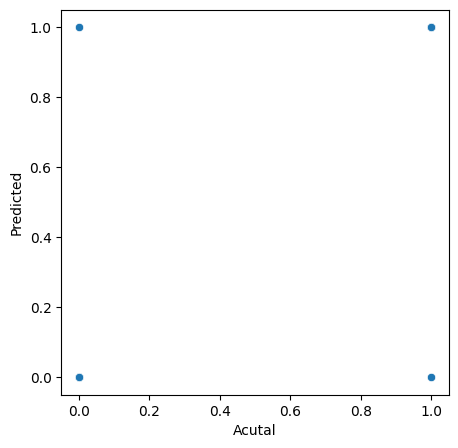

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.xlabel("Acutal", fontsize=10)
plt.ylabel("Predicted", fontsize=10)
sns.scatterplot(x=y_test, y=vtc_predict, ax=ax)
plt.show()

# **Roc(Reciver Oparating Charistic curve)- AUC(Area Under the Curve):**

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
auc_score= roc_auc_score(y_test, vtc_predict)
print("{:.2f}".format(auc_score))

0.99


In [ ]:
fpr , tpr, threshold = roc_curve(y_test, svm_predict)

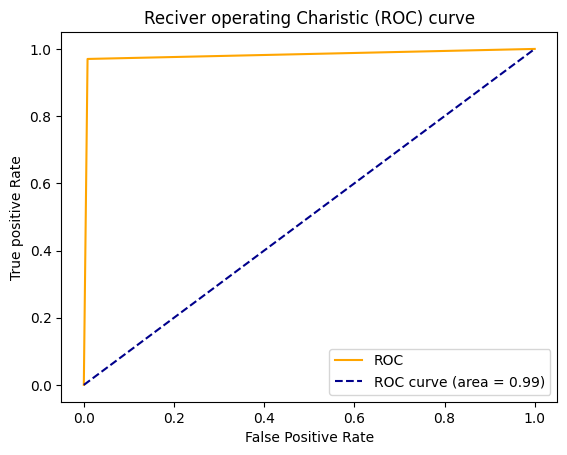

In [ ]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0,1], [0,1], color='darkblue', linestyle='--', label='ROC curve (area = %0.2f)' %auc_score)
plt.xlabel('False Positive Rate')
plt.ylabel("True positive Rate")
plt.title('Reciver operating Charistic (ROC) curve')
plt.legend()
plt.show()